Epoch 1/100
38/38 [==============================] - 10s 89ms/step - loss: 0.0413
Epoch 2/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0039
Epoch 13/100
38/38 

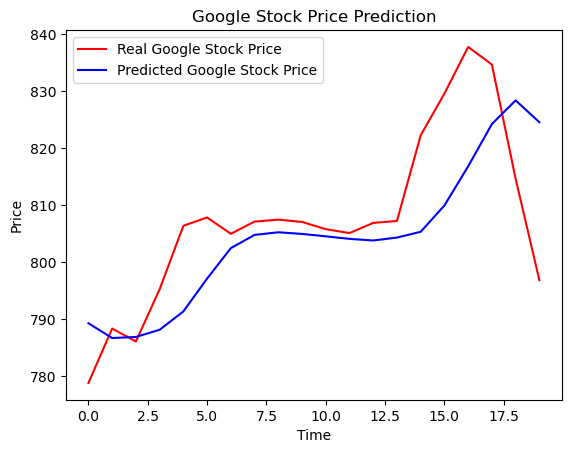

RMSE: 11.68


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error

# Step 1: Load training data
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Step 2: Scale training data
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Step 3: Prepare training sequences
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Step 4: Build the model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

# Step 5: Prepare test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 6: Predict
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Step 7: Plot
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')


plt.ylabel('Price')
plt.legend()
plt.show()

# Step 8: RMSE Evaluation
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f'RMSE: {rmse:.2f}')
